In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("50_Startups.csv")
dataset = pd.get_dummies(dataset, drop_first =True, dtype = int)
dataset

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [3]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [4]:
independent = dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York']]
dependent = dataset[['Profit']]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.3, random_state = 0)

In [6]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(criterion = 'squared_error', splitter = 'random')
regressor.fit(X_train,y_train)

DecisionTreeRegressor(splitter='random')

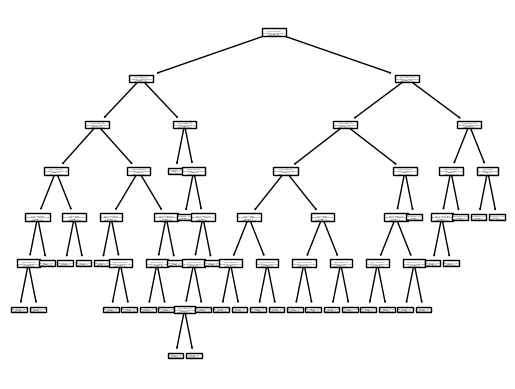

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [8]:
y_predict = regressor.predict(X_test)

In [9]:
from sklearn.metrics import r2_score
r_score = r2_score(y_predict, y_test)
r_score

0.871800671783735